In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gradrate3/GradRate3.csv
/kaggle/input/gradrate5/GradRate5.csv
/kaggle/input/gradrate4/GradRate4.csv


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/kaggle/input/gradrate5/GradRate5.csv")
df.head()

,Year,Zone,PopSize,Pass,SchoolType,Gender,LocalFlag_EN
0,2015,Umm AlQuwain,SM,0,Continuing Education Centers,Female,Local
1,2016,Umm AlQuwain,SM,0,Continuing Education Centers,Female,Local
2,2016,Fujairah,SM,0,Continuing Education Centers,Male,Expat
3,2017,Umm AlQuwain,SM,0,Continuing Education Centers,Female,Local
4,2015,Ras AlKhaima,SM,0,Continuing Education Centers,Male,Expat


In [6]:
df.shape

(401, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          401 non-null    int64 
 1   Zone          401 non-null    object
 2   PopSize       401 non-null    object
 3   Pass          401 non-null    int64 
 4   SchoolType    401 non-null    object
 5   Gender        401 non-null    object
 6   LocalFlag_EN  401 non-null    object
dtypes: int64(2), object(5)
memory usage: 22.1+ KB


In [8]:
df.describe()

,Year,Pass
count,401.000000,401.000000
mean,2017.052369,0.783042
std,1.401696,0.412688
min,2015.000000,0.000000
25%,2016.000000,1.000000
50%,2017.000000,1.000000
75%,2018.000000,1.000000
max,2019.000000,1.000000


In [9]:
df.describe(include='all')

,Year,Zone,PopSize,Pass,SchoolType,Gender,LocalFlag_EN
count,401.000000,401,401,401.000000,401,401,401
unique,NaN,6,2,NaN,4,2,2
top,NaN,Ajman,SM,NaN,Continuing Education Centers,Male,Local
freq,NaN,73,267,NaN,120,212,206
mean,2017.052369,NaN,NaN,0.783042,NaN,NaN,NaN
std,1.401696,NaN,NaN,0.412688,NaN,NaN,NaN
min,2015.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,2016.000000,NaN,NaN,1.000000,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,2018.000000,NaN,NaN,1.000000,NaN,NaN,NaN


In [10]:
import matplotlib.pyplot as plt

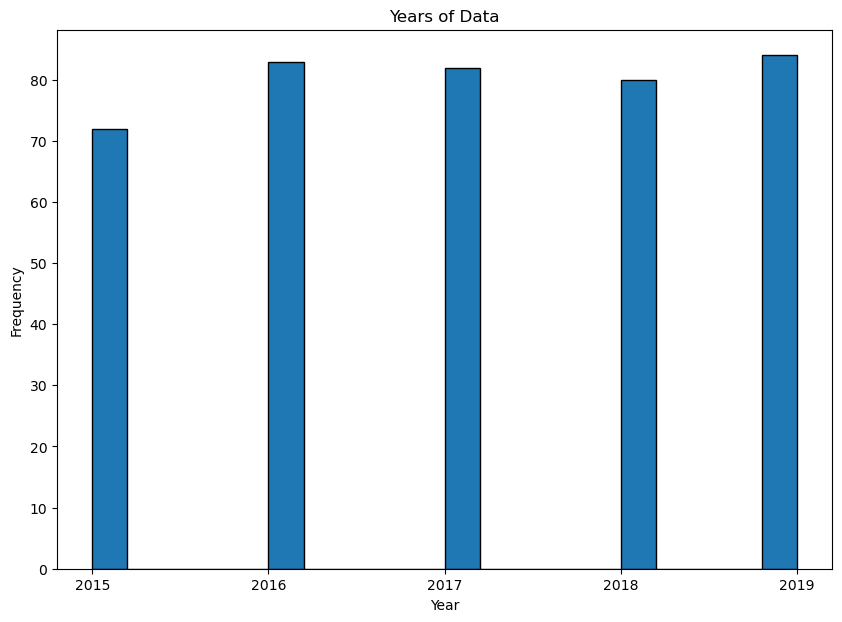

In [16]:
plt.figure(figsize = (10,7))
plt.hist(df['Year'], bins=20, edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel ('Frequency')
plt.xticks([2015, 2016, 2017, 2018, 2019]) 
plt.title ('Years of Data')
plt.show()

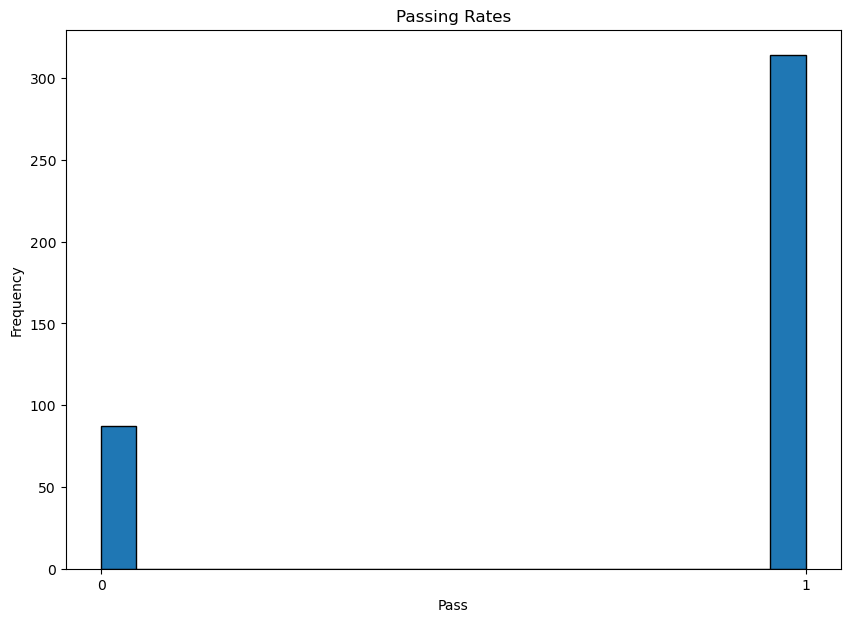

In [17]:
plt.figure(figsize = (10,7))
plt.hist(df['Pass'], bins=20, edgecolor = 'black')
plt.xlabel('Pass')
plt.ylabel ('Frequency')
plt.xticks([0, 1]) 
plt.title ('Passing Rates')
plt.show()

In [18]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Zone'>

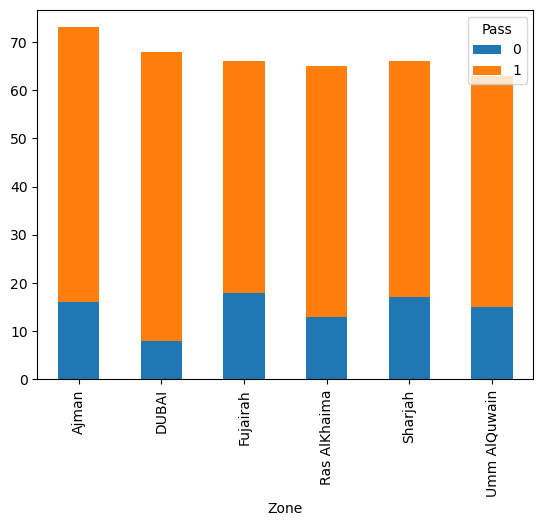

In [22]:
pd.crosstab (df['Zone'], df['Pass']).plot(kind = 'bar', stacked = True)

<Axes: xlabel='PopSize'>

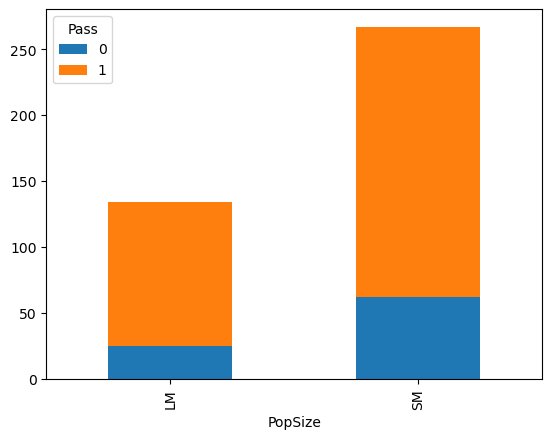

In [20]:
pd.crosstab (df['PopSize'], df['Pass']).plot(kind = 'bar', stacked = True)

<Axes: xlabel='SchoolType'>

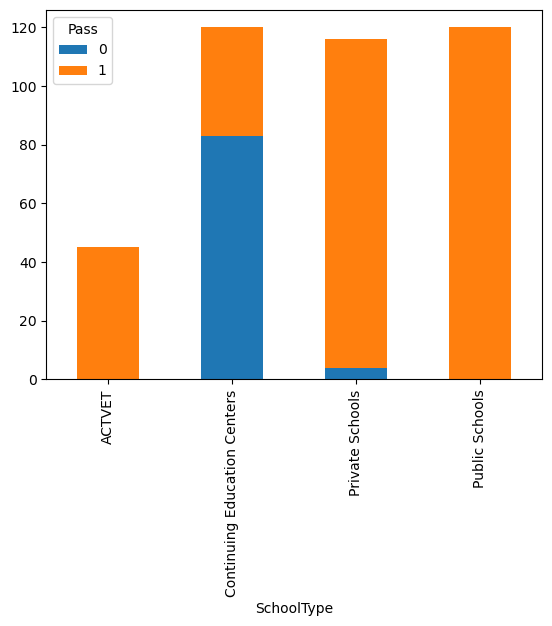

In [21]:
pd.crosstab (df['SchoolType'], df['Pass']).plot(kind = 'bar', stacked = True)

<Axes: xlabel='Gender'>

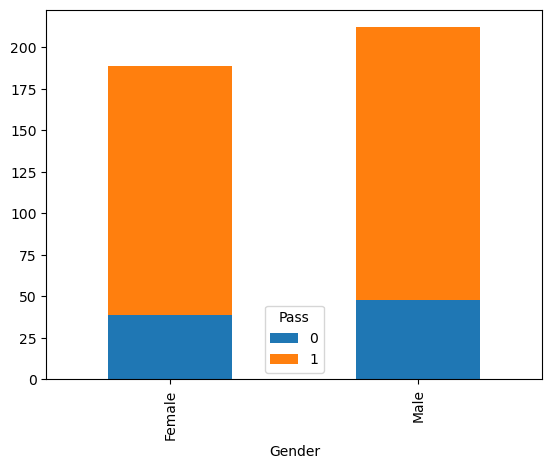

In [23]:
pd.crosstab (df['Gender'], df['Pass']).plot(kind = 'bar', stacked = True)

In [24]:
df['Pass'].value_counts()

1    314
0     87
Name: Pass, dtype: int64

[Text(0.5, 1.0, 'Passing by Year')]

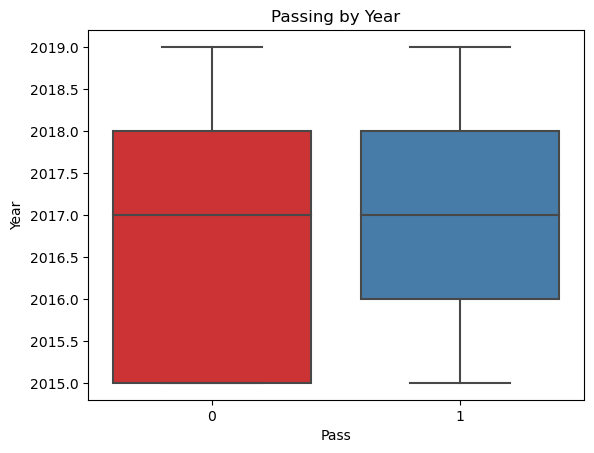

In [6]:
sns.boxplot (y='Year', x = 'Pass', data = df, palette = 'Set1').set(title  = "Passing by Year")

In [25]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Pass==1]
df_minority = df[df.Pass==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Pass.value_counts()


0    315
1    314
Name: Pass, dtype: int64

In [8]:
print(df)

     Year          Zone PopSize  Pass                    SchoolType  Gender  \
0    2015  Umm AlQuwain      SM     0  Continuing Education Centers  Female   
1    2016  Umm AlQuwain      SM     0  Continuing Education Centers  Female   
2    2016      Fujairah      SM     0  Continuing Education Centers    Male   
3    2017  Umm AlQuwain      SM     0  Continuing Education Centers  Female   
4    2015  Ras AlKhaima      SM     0  Continuing Education Centers    Male   
..    ...           ...     ...   ...                           ...     ...   
396  2019  Umm AlQuwain      SM     1                Public Schools    Male   
397  2019  Umm AlQuwain      SM     1                Public Schools    Male   
398  2019  Umm AlQuwain      SM     1               Private Schools  Female   
399  2019  Umm AlQuwain      SM     1               Private Schools    Male   
400  2019  Umm AlQuwain      SM     1  Continuing Education Centers  Female   

    LocalFlag_EN  
0          Local  
1          Lo

In [26]:
df = pd.get_dummies(df, columns=['Zone', 'PopSize', 'SchoolType', 'Gender', 'LocalFlag_EN'], drop_first=True)

df

,Year,Pass,Zone_DUBAI,Zone_Fujairah,Zone_Ras AlKhaima,Zone_Sharjah,Zone_Umm AlQuwain,PopSize_SM,SchoolType_Continuing Education Centers,SchoolType_Private Schools,SchoolType_Public Schools,Gender_Male,LocalFlag_EN_Local
0,2015,0,0,0,0,0,1,1,1,0,0,0,1
1,2016,0,0,0,0,0,1,1,1,0,0,0,1
2,2016,0,0,1,0,0,0,1,1,0,0,1,0
3,2017,0,0,0,0,0,1,1,1,0,0,0,1
4,2015,0,0,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,2019,1,0,0,0,0,1,1,0,0,1,1,0
397,2019,1,0,0,0,0,1,1,0,0,1,1,1
398,2019,1,0,0,0,0,1,1,0,1,0,0,0
399,2019,1,0,0,0,0,1,1,0,1,0,1,0


In [11]:
numeric_cols = ['Year', 'Zone_DUBAI', 'Zone_Fujairah', 'Zone_Ras AlKhaima', 'Zone_Sharjah', 'Zone_Umm AlQuwain', 'PopSize_SM', 'SchoolType_Continuing Education Centers', 'SchoolType_Private Schools', 'SchoolType_Public Schools', 'Gender_Male', 'LocalFlag_EN_Local']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'Pass'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['Year', 'Zone_DUBAI', 'Zone_Fujairah', 'Zone_Ras AlKhaima', 'Zone_Sharjah', 'Zone_Umm AlQuwain', 'PopSize_SM', 'SchoolType_Continuing Education Centers', 'SchoolType_Private Schools', 'SchoolType_Public Schools', 'Gender_Male', 'LocalFlag_EN_Local']
[]


In [32]:
labels=pd.DataFrame(df['Pass'])
labels.Pass[labels.Pass=='yes'] = 1
labels.Pass[labels.Pass == 'no'] = 0
df=df.apply(pd.to_numeric)
labels=labels.apply(pd.to_numeric)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df, labels, test_size=0.3, random_state=0
)

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression(class_weight = "balanced")
logmodel.fit(X_train, y_train)
predictions_log = logmodel.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        91

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



In [43]:
importance = logmodel.coef_.flatten()

In [44]:
from matplotlib import pyplot

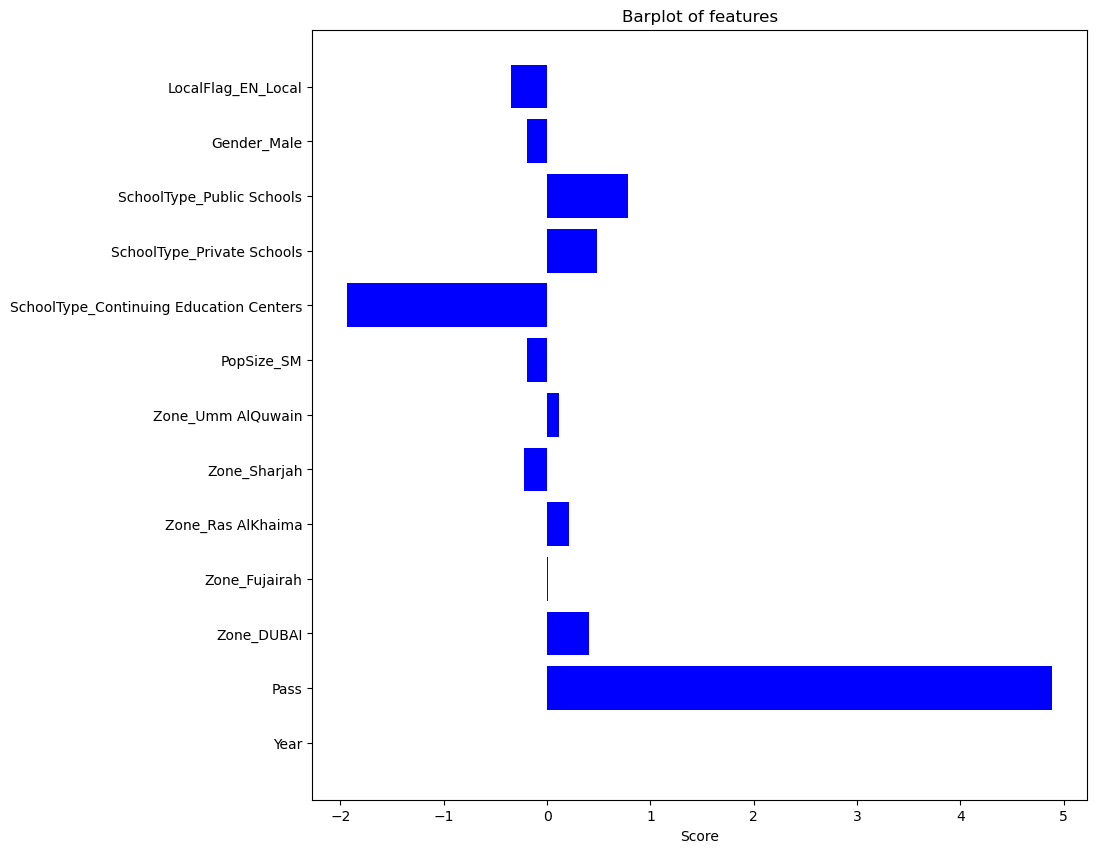

In [46]:
pyplot.rcParams["figure.figsize"] = (10,10)
pyplot.barh(df.columns, importance, color = "b")
pyplot.title ("Barplot of features")
pyplot.xlabel("Score")
pyplot.show()

NameError: name 'cnf_matrix' is not defined

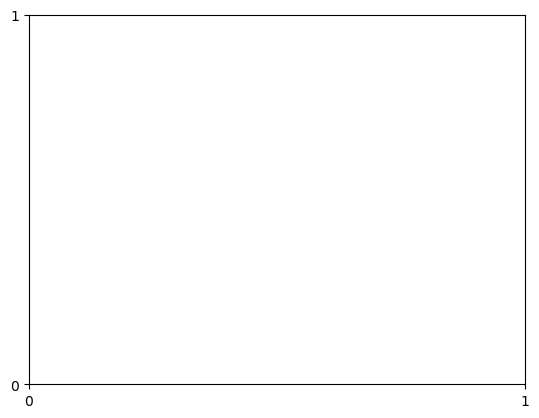

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [17]:
from sklearn.metrics import classification_report
target_names = ['Not Passing', 'Passing', 'Unknown']
print(classification_report(y_test, y_pred, target_names=target_names))

NameError: name 'y_test' is not defined

In [18]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'X_test' is not defined

In [19]:
results = sm.OLS(y,X).fit()
print(results.summary())

NameError: name 'sm' is not defined

In [20]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['Pass'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['Pass'].value_counts(normalize=True))
print()
print(df_test['Pass'].value_counts(normalize=True))

(320, 13)
(81, 13)

1    0.784375
0    0.215625
Name: Pass, dtype: float64

1    0.777778
0    0.222222
Name: Pass, dtype: float64


In [21]:
labels = pd.DataFrame(df['Pass'])
labels.Pass[labels.Pass =='yes'] = 1
labels.Pass[labels.Pass == 'no'] = 0
df = df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)

In [25]:
import statsmodels.api as sm
logit_model=sm.Logit(df_train, df_test)
result=logit_model.fit()
print(result.summary2())

ValueError: The indices for endog and exog are not aligned

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

NameError: name 'X' is not defined

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

NameError: name 'X_test' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Passing Predictions')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
logmodel = LogisticRegression(class_weight = 'balanced')
logmodel.fit(X_train, y_train)
y = 'Gender'(y, warn=True)
predictions_log = logmodel.predict(X_test)

In [ ]:
clf = LogisticRegression (C=1, penalty='l1', solver='liblinear') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

In [ ]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [ ]:
plot_roc_curve(clf, X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['Pass']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

In [ ]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [ ]:
plot_precision_recall_curve(clf, X_test, y_test)

In [ ]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

In [ ]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [ ]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

In [ ]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
confusion_matrix(X_test, y_test)  
plt.show()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
from sklearn.utils.validation import check_consistent_length, check_array

def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput

In [ ]:
from sklearn.metrics import RocCurveDisplay
import sklearn
svc = sklearn.svm.SVC()
svc_disp = RocCurveDisplay.from_estimator(svc, df_train, df_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, df_train, df_test, ax=svc_disp.ax_)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)